<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/i_pg23_hafta11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **TARTIŞMA:<br>Korelasyon Yokken İki Ayrı Veri Kategorisi Arasında İlişki Var Mıdır?**<br><br>

 **Pearson Momentler Çarpımı Korelasyonu (Pearson Korelasyonu)**, iki ayrı veri kategorisi arasında bir doğrusal ilişkinin varlığını ve var ise bu ilişkinin gücünü inceler.<br>Diğer bir ifadeyle "*İki ayrı veri kategorisine ait ***değerler*** beraber hareket ediyor mu?*" sorusuna yanıt bulmak için Pearson Korelasyonu'na başvurabiliriz.<br><br>
 **Spearman Sıra Korelasuonu**, iki ayrı veri kategorisi değerlerinin büyüklük cinsinden sıralamaları arasındaki ilişkinin varlığını ve vari ise bu ilişkinin gücünü inceler. Ve bu sayede Pearson Korelasyonu'nun yakalamakta zorlandığı ***doğrusal olmayan ilişki***leri de tespit edebilir.<br><br>
 Ancak; Pearson Korelasyonu da Spearman Sıra Korelasyonu da iki ayrı veri kategorisi arasında fonksiyonel ilişkiyi bulabilir ve bağıntı ilişkisini yakalayamayabilmektedir.<br><br>
 **Örneğin**; bir çember etrafında dağılan noktaları oluşturan iki veri kategorisi için Pearson Korelasyonu da Spearman Sıra Korelasyonu da çember denklemi oluşturan bağıntı ilişkisini yakalayamacaktır.<br><br>
 Buradan çıkarılabilecek önemli ders, **korelasyonun olmaması** iki veri kategorisi arasında bir ilişki olmadığı anlamına gelmez ancak; **korelasyonun güçlü olması** iki veri kategorisi arasında bir ilişki olduğuna dair güçlü bir işarettir.

In [1]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#@title

np.random.seed(101)

r = 10

df = pd.DataFrame( index = range(int(.5*10**3)), columns = ['x_coordinate','y_coordinate'] )

x = np.random.choice([1,-1], size = len(df))*np.linspace(-10,10, len(df))

df.x_coordinate = x

df['x_coordinate'] += np.random.normal(loc = 0, scale = .1*df.x_coordinate.std(), size = len(df))

y = np.array( np.random.choice([1,-1])*(r**2 - i**2)**.5 for i in x )

df.y_coordinate = y

df['y_coordinate'] += np.random.normal(loc = 0, scale = .1*df.y_coordinate.std(), size = len(df))


df2 = pd.DataFrame( index = range(int(.5*10**3)), columns = ['x_coordinate','y_coordinate'] )

y = np.random.choice([1,-1], size = len(df2))*np.linspace(-10,10, len(df))

df2.y_coordinate = y

df2['y_coordinate'] += np.random.normal(loc = 0, scale = .1*df2.y_coordinate.std(), size = len(df2))

x = np.array( np.random.choice([1,-1])*(r**2 - i**2)**.5 for i in y )

df2.x_coordinate = x

df2['x_coordinate'] += np.random.normal(loc = 0, scale = .1*df2.x_coordinate.std(), size = len(df2))


df = pd.concat([df,df2], axis = 0)

Text(0, 0.5, 'veri2')

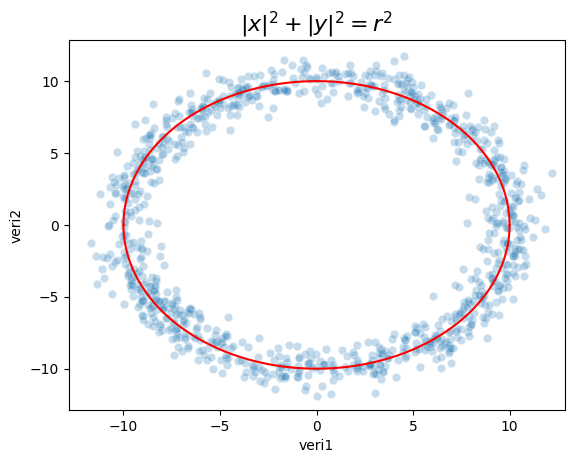

In [3]:
#@title
sns.scatterplot(x = df.x_coordinate, y = df.y_coordinate, alpha = .25)

plt.rcParams['figure.figsize'] = [7,7]
plt.xlim( -10-.4*df.x_coordinate.std(),10+.4*df.x_coordinate.std() )
plt.ylim( -10-.4*df.y_coordinate.std(),10+.4*df.y_coordinate.std() )

def upperC(x):
  return (10**2 - x**2)**.5

x = np.linspace(-10,10, 10**5)
sns.lineplot( x = x, y = [upperC(i) for i in x], color = 'red', )
sns.lineplot( x = x, y = [-upperC(i) for i in x], color = 'red', )

plt.title( '$|x|^2+|y|^2=r^2$', size = 16 )

plt.xlabel( 'veri1' )
plt.ylabel( 'veri2' )

In [4]:
#@title
from scipy import stats

sc, pc = stats.spearmanr( df.x_coordinate, df.y_coordinate ), stats.pearsonr( df.x_coordinate, df.y_coordinate )

df2 = pd.DataFrame( index = ['İstatistik', 'p-değeri'] , columns = ['Spearman Sıra Korelasyonu', 'Pearson Momentler Çarpımı Korelasyonu'])

df2['Spearman Sıra Korelasyonu'] = sc
df2['Pearson Momentler Çarpımı Korelasyonu'] = pc

df2

Spearman Sıra Korelasyonu  Pearson Momentler Çarpımı Korelasyonu
İstatistik                   0.005726                               0.006170
p-değeri                     0.856497                               0.845496

#  **10. HAFTANIN DEVAMI**
# - **EKSİK VERİNİN YAMANMASI**<br><br>
Önceki dersimizde eksik veri yönetimi stratejilerinden birinin eksik veriyi yamamak olduğundan bahsetmiştik ve bunun için 4 öneride bulunmuştuk:
- Eksik veri yerine ilgili veri kategorisinin ortalama değerinin yazılması,
- Eksik veri yerine ilgili veri kategorisinin ortanca değerinin yazılması,
- Eksik veri yerine ilgili veri kategorisinin mod değerinin yazılması,
- Eksik veri yerine bu verinin tahmini değerinin yazılması.

Hadi yeni bir veri kümesinde bunu görelim...

##  **[Kaggle.com](https://kaggle.com) üzerine...**<br><br>

Kaggle aslında bir google hesabı olan hbv.edu.tr uzantılı e-posta adresiniz ile kayıt olabileceğiniz;
- Çok sayıda veri kümesi içeren,
- Colab gibi Python dili ile kodlama yapabileceğiniz bir ortam sunan

veri bilimi temalı bir platformdur.<br><br>
##  **kaggle.com üzeriden veri kümeleri nasıl yerel bilgisayara indirilir?**<br><br>

Kaggle.com içerisinde sol tarafta sıralanan sekmeler içerisinden ***[datasets](https://www.kaggle.com/datasets)***'e girecek olursanız yeni bir sayfa açılacaktır.<br><br>Bu pencede arzu ettiğiniz içerik veya tema sözcükleri ile arama yaparsanız muhtemelen üzerinde çalışabileceğiniz çok sayıda veri kümesini size sunacaktir.<br><br>Bu sıralanan veri kümeleri arasından seçim yaparken veri kümesinin başlığının yanı sıra tanıtıcı etiketin son satırındaki Usability (Kullanılabilirlik) puanına da bakmanız önerilir. Bu puan 10 üzerinden bir değerlendirmedir.<br><br>
İlgili bir veri kümesine giriş yaptığınızda açılan pencere, bu veri kümesinin tanıtımını içermektedir.<br><br>
Sağ üstte ***New Notebook*** (Yeni Defter - Colab benzeri kodlama ortamı...) seçeneğini bulabilirsiniz. Buraya giriniz.<br><br>
Girdiğinizde hazır düzenlenmiş olan ilk kod hücresini çalıştırınız.<br><br>
Yeni bir kod hücresi oluşturunuz.<br><br>
Bu yeni kod hücresinde veri kümesini "df" adındaki bir değişkene bir pandas veri tablosu olarak atayacaksınız ve ardından da df.to_excel( ... ) komutu ile bu veri tablosunu sizin vereceğiniz yeni bir adla uzak bilgisayarın kalıcı hafızasına indirmiş olacaksınız.
- Bunun için önce veri kümesinin ***yol***'unu öğrenmelisiniz. Sağ tarafta ***Input*** sekmesine tıklayınız. Bu sekme içinde muhtemelen .csv uzantılı bir dosya olacaktır. Bu dosyaya tıkladığınızda ekranın alt kısmında bu verinin bir öngösterimi ortaya çıkacaktır. Başlık bölümünde önce veri kümesinin adı, sonra da veri kümesinin ***yolu*** ve ***Copy*** butonu yer almaktadır. Bu butona tıklayarak veri kümesinin ***yolunu*** kopyalamış olursunuz.
- Yeni oluşturmuş olduğunuz kod hücresi içine<br>***df = pd.read_csv( BURAYA KOPYALAMIŞ OLDUĞUNUZ YOLU YAPIŞTIRIN )***<br>şablonuna uygun biçimde bir kod yazınız.
- Yine yeni kod hücresinde son satıra ***df*** yazınız ve kod hücresini çalıştırınız. Bazı durumlarda veri tablonuz "umduğunuz" gibi düzenli biçimde oluşmayabilir. Bunun en olası nedeni csv dosyasında kural olarak virgülle ayrılması gereken veri parçalarının başka bir separatörle ayrılmış olmasıdır. Tablonun en sağına gidip biraz inceleyerek kullanılan separatörü belirleyebilirsiniz. Örneğin kullanılan separatör ***\t*** olsun. Bu durumda tablonuzu düzeltmek için önceki kod satırını yeniden düzenleyiniz:<br>***df = pd.read_csv( DOSYA_YOLU, sep = "\t" )***
- Eğer tablonuz düzgün görünüyorsa sıra bu dosyayı uzak bilgisayarın kalıcı hafızasına indirmeye gelmiştir. Yeni kod hücresinin son satırına<br>***df.to_excel( "data.xlsx" )***<br>yazıp kod hücresini çalıştırınız.
- Şimdi sağda ***Output*** sekmesi altında ***/kaggle/working*** sekmesi içinde dosyanızı görebilirsiniz.
- İmlecinizi ***data.xlsx***'in üzerine getirdiğinizde aynı satırın en sağında $\vdots$ menüsü belirecektir ve bu menüye tıkladığınızda ***Download*** seçeneğini görebilirsiniz. Bu seçeneği tıklayınız.
- Artık veri seti, yerel cihazınıza inmiştir.

# **[VERİ KAYNAĞI](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)**<br><br>

##**Bu veriyi yukarıda tarif edildiği gibi önce yerel cihazınıza ardından da Colab oturumuna yükleyiniz.**

In [2]:
import pandas as pd

df = pd.read_excel( '/content/data.xlsx', index_col = 0 )
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## **Şimdi bu veri kümesinde eksik veri içeren bir veri kategorisi var mı bulalım**<br><br>

***.isna()*** metodu, veri tablosuun her bir hücresi için bu hücrede bir veri girişi yapılmışsa "False" (yanlış) ve veri yapılmamaış, hücre boşsa "True" (doğru) değerleri içeren yeni bir veri tablosu oluşturacaktır.<br><br>
Bu yeni veri tablsounda da ***.sum()*** metodu uygulandığında veri tablosunun herbir sütunu için değerler toplamı hesaplanacaktır. Böylece herbir beri sütununda kaç eksik veri olduğu görülebilir.

In [3]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**"Income"** veri kategorisinde 24 eksik veri var...<br><br>

Income verisini inceleyelim:
- verinin betimsel istatistiklerine,
- yatıklık (skewness) değerlerine,
- görsel yapısına

bakalım.

In [4]:
#  Income veri kategorisi için betimsel istatistikler

df.Income.describe().T

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Ortalama ve ortanca arasındaki farklın $52247.25 - 51381.50 = 865.75$ olduğunu ve bunun oldukça dikkate değer bir büyüklük olduğunu farkettiniz mi?

In [5]:
#  Income veri kategorisi için yatıklık değeri

df.Income.skew()

6.763487372811116

Verinin yatıklık istatistiği 6.76'dır. <br><br>
Bu istatistik;
- 0 veya 0'a çok yakın değerlerde iken veri simetriktir,
- Negatif değerliyken veri sola yatıktır,
- Pozitif değerliyken veri sağa yatıktır.

<br>Income veri kategorisi hatırı sayılır derecede sağa yatıktır.<br><br>Sağa yatıklıkğı kolay anlamak için bir balonun sağ tarafından baskı uyguladğınızı hayal ediniz. Balondaki hacim daha çok solda toplanacaktır ancak; siz baskıyı sağdan uygulamaktasınız....<br><br>

<Axes: xlabel='Income', ylabel='Count'>

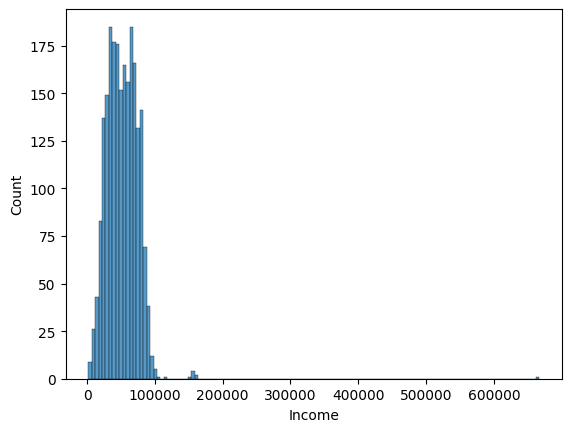

In [6]:
#  Income veri kategorisi için görsel

import seaborn as sns

sns.histplot( df.Income )

Verinin görseli verinin çoğunun 100000 ve altı değerlerde toplandığını ve 6000000'in üzerinde değerli uç değerlerin var olabileceğini ortaya koymaktadır.<br><br>
Bu sağ kuyruktaki uç değerin ortalamadan kaç standart sapma uzakta olduğuna bakalım.<br><br>
Eğer bu sağ kuyruktaki değer 3 standart sapmadan ciddi miktarda daha uzaksa bir uç değerden (outlier) bahsedebiliriz.

In [7]:
( df.Income.max() - df.Income.mean() ) / df.Income.std()

24.407773309669338

Sağdaki büyük değer ortalamada 24.4 standart sapma uzaktaymış...<br><br>
Bu değerin bir uç değer olduğunu düşünebiliriz.<br><br>
Bu değeri de silebiliriz...

In [8]:
#  Income veri kategorisinde ortalama değerden 6 standart sapmadan büyük değerli gözlemler:

df[ ( df.Income - df.Income.mean() ) / df.Income.std() > 6 ] 

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  02-06-2013       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [9]:
#  Uç değerlerin indis etiketleri listesi

list(
    df[ ( df.Income - df.Income.mean() ) / df.Income.std() > 6 ].index
)

[2233]

In [10]:
#  Uç değerleri siliyoruz.

for i in list(    df[ ( df.Income - df.Income.mean() ) / df.Income.std() > 6 ].index    ):
  df['Income'][i] = None

<ipython-input-10-e66b29b6fb02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][i] = None


In [11]:
#  Bakalım yatıklık nasıl değişti

df.Income.skew()

0.34734967591402827

Yatıklık istatistiği 0'a yaklaştı.

In [12]:
#  Bakalım betimsel istatistikler nasıl değişti

df.Income.describe().T

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

Ortalama ve ortanca arasındaki fark yarıya düştü

<Axes: xlabel='Income', ylabel='Count'>

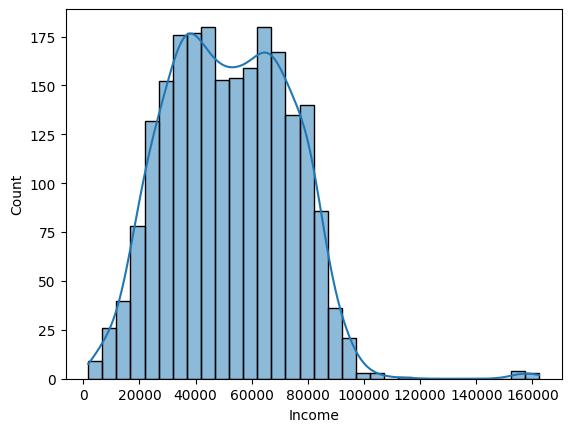

In [13]:
#  Bakalım veri nasıl görünüyor

sns.histplot( df.Income, kde = True )

Artık ortanca'yı kullanmaktan çekinecek nedenimiz kalmadı. Veri oldukça simetrik olduğu için ortanca, uç değerlerden daha az etkilenerek verinin genel karakterinin iyi bir temsili haline geldi.

In [14]:
#  Income veri kategorisinde eksik veri içeren indislerin listesi

list(
    df[ df.Income.isna() == True ].index 
)

[10,
 27,
 43,
 48,
 58,
 71,
 90,
 91,
 92,
 128,
 133,
 312,
 319,
 1379,
 1382,
 1383,
 1386,
 2059,
 2061,
 2078,
 2079,
 2081,
 2084,
 2228,
 2233]

In [15]:
# #  Bunların yerine ortancayı yazalım
# for i in list(    df[ df.Income.isna() == True ].index    ):
#   df['Income'].loc[i] = df.Income.median()

In [16]:
#  Ya da kısaca bunu da yapabilirdik

df['Income'] = df.Income.fillna( df.Income.median() )

In [17]:
#  Mevcut veri sütunu adları

list( df.columns )

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [18]:
#  İsterseniz yukarıdaki listeyi kopyalayayıp bir kod hücresinde df.columns 
#  değeri olarak atayabilir ve üzerinde istediğiniz değişikliği yapabilirsiniz.
#  Örneğin; veri sütunu adlarını Türkçeleştirebilirsiniz.

df.columns = ['ID',
 'DoğumYılı',
 'Eğitim',
 'Medeni',
 'Gelir',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

df

ID  DoğumYılı      Eğitim    Medeni    Gelir  Kidhome  Teenhome  \
0      5524       1957  Graduation    Single  58138.0        0         0   
1      2174       1954  Graduation    Single  46344.0        1         1   
2      4141       1965  Graduation  Together  71613.0        0         0   
3      6182       1984  Graduation  Together  26646.0        1         0   
4      5324       1981         PhD   Married  58293.0        1         0   
...     ...        ...         ...       ...      ...      ...       ...   
2235  10870       1967  Graduation   Married  61223.0        0         1   
2236   4001       1946         PhD  Together  64014.0        2         1   
2237   7270       1981  Graduation  Divorced  56981.0        0         0   
2238   8235       1956      Master  Together  69245.0        0         1   
2239   9405       1954         PhD   Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0     04-09-2012       58       635  ...                  7             0   
1     08-03-2014       38        11  ...                  5             0   
2     21-08-2013       26       426  ...                  4             0   
3     10-02-2014       26        11  ...                  6             0   
4     19-01-2014       94       173  ...                  5             0   
...          ...      ...       ...  ...                ...           ...   
2235  13-06-2013       46       709  ...                  5             0   
2236  10-06-2014       56       406  ...                  7             0   
2237  25-01-2014       91       908  ...                  6             0   
2238  24-01-2014        8       428  ...                  3             0   
2239  15-10-2012       40        84  ...                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
0                 3         11         1  
1                 3         11         0  
2                 3         11         0  
3                 3         11         0  
4                 3         11         0  
...             ...        ...       ...  
2235              3         11         0  
2236              3         11         0  
2237              3         11         0  
2238              3         11         0  
2239              3         11         1  

[2240 rows x 29 columns]

In [19]:
#  Eğitim sütununda sözel veri var.
#    Burada birbirinden farklı kaç veri olduğunu ve bu farklı verinin ne 
#    olduğunu görelim

len( df.Eğitim.unique() ), list( df.Eğitim.unique() )

(5, ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'])

In [22]:
#  Şimdi bu sözel veriyi kukla değişkene dönüştürerek sayısallaştıralım.
#    (Geri kalan tüm sözel veriyi de egzersiz olarak siz sayısallaştırınız.)

df['Graduation'] = 0 + np.array( df.Eğitim == 'Graduation' )
df['PhD'] = 0 + np.array( df.Eğitim == 'PhD' )
df['Master'] = 0 + np.array( df.Eğitim == 'Master' )
df['Basic'] = 0 + np.array( df.Eğitim == 'Basic' )
df['2n_Cycle'] = 0 + np.array( df.Eğitim == '2n Cycle' )

df = df.drop( ['Eğitim',], axis = 1 )

df

AttributeError: ignored

Artık tüm sözel veriyi sayısallaştırdıysanız verinin betimsel istatistiklerine bakabiliriz.

In [ ]:
df.describe().T

Veriye bir de karşılaştırmalı görsel bir tabloda bakalım:

In [36]:
import seaborn as sns

sns.pairplot( df )

Veri kategorileri arasındaki korelasyonu da inceleyelim

In [24]:
#  Spearmanr...

from scipy import stats

#  SCR adında bir tablo yaratalım ve bu tabloda korelasyon verisi özetlensin.

SCR = pd.DataFrame( index = df.columns, columns = df.columns )

#  Şimdi bu tablonun herbir hücresine anlamlı korelasyon değerlerini koyalım:
for i in df.columns:
  for j in df.columns:
    scr = stats.spearmanr( df[i], df[j] )

    if scr[1] < .5:
      SCR.loc[i,j] = np.round(scr[0],3)

SCR

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


ID DoğumYılı Medeni  Gelir Kidhome Teenhome  \
ID                     1.0       NaN  0.016    NaN     NaN      NaN   
DoğumYılı              NaN       1.0 -0.044 -0.217   0.259   -0.386   
Medeni               0.016    -0.044    1.0    NaN  -0.016      NaN   
Gelir                  NaN    -0.217    NaN    1.0  -0.558    0.047   
Kidhome                NaN     0.259 -0.016 -0.558     1.0   -0.046   
Teenhome               NaN    -0.386    NaN  0.047  -0.046      1.0   
Dt_Customer         -0.031       NaN -0.016    NaN     NaN      NaN   
Recency             -0.046    -0.021  0.017    NaN     NaN      NaN   
MntWines            -0.026    -0.234    NaN  0.829   -0.58    0.111   
MntFruits           -0.022    -0.025    NaN  0.579   -0.45   -0.201   
MntMeatProducts        NaN    -0.112  0.025  0.814  -0.551   -0.128   
MntFishProducts     -0.029    -0.031  0.027  0.575  -0.453   -0.229   
MntSweetProducts    -0.034       NaN    NaN  0.565  -0.439   -0.198   
MntGoldProds        -0.042    -0.077  0.017  0.504  -0.426   -0.023   
NumDealsPurchases   -0.024    -0.087 -0.034 -0.194   0.261    0.481   
NumWebPurchases     -0.025    -0.164    NaN  0.572  -0.422    0.146   
NumCatalogPurchases    NaN    -0.179  0.022  0.789  -0.598   -0.044   
NumStorePurchases   -0.023    -0.168    NaN   0.73  -0.557    0.077   
NumWebVisitsMonth      NaN     0.131 -0.035 -0.641   0.482    0.112   
AcceptedCmp3        -0.036     0.064 -0.025 -0.015    0.02   -0.045   
AcceptedCmp4        -0.025    -0.067    NaN  0.222  -0.164    0.037   
AcceptedCmp5           NaN     0.015    NaN  0.394  -0.211     -0.2   
AcceptedCmp1        -0.022       NaN -0.015  0.328   -0.18   -0.145   
AcceptedCmp2        -0.016       NaN  0.019  0.105  -0.084   -0.018   
Complain             0.034       NaN    NaN -0.031    0.04      NaN   
Z_CostContact          NaN       NaN    NaN    NaN     NaN      NaN   
Z_Revenue              NaN       NaN    NaN    NaN     NaN      NaN   
Response            -0.022     0.021    NaN   0.16  -0.077   -0.159   
Graduation           0.018      0.06    NaN    NaN     NaN   -0.021   
PhD                    NaN    -0.118    NaN  0.095  -0.046    0.086   
Master              -0.025    -0.075  0.015  0.018     NaN    0.024   
Basic                  NaN     0.114  0.026 -0.233   0.061   -0.122   
2n_Cycle               NaN     0.102    NaN  -0.06   0.023   -0.054   

                    Dt_Customer Recency MntWines MntFruits  ... AcceptedCmp2  \
ID                       -0.031  -0.046   -0.026    -0.022  ...       -0.016   
DoğumYılı                   NaN  -0.021   -0.234    -0.025  ...          NaN   
Medeni                   -0.016   0.017      NaN       NaN  ...        0.019   
Gelir                       NaN     NaN    0.829     0.579  ...        0.105   
Kidhome                     NaN     NaN    -0.58     -0.45  ...       -0.084   
Teenhome                    NaN     NaN    0.111    -0.201  ...       -0.018   
Dt_Customer                 1.0     NaN      NaN    -0.023  ...        0.025   
Recency                     NaN     1.0    0.019     0.025  ...          NaN   
MntWines                    NaN   0.019      1.0     0.518  ...        0.138   
MntFruits                -0.023   0.025    0.518       1.0  ...          NaN   
MntMeatProducts          -0.016   0.028    0.824     0.713  ...        0.063   
MntFishProducts          -0.039     NaN    0.525     0.705  ...          NaN   
MntSweetProducts            NaN   0.024    0.505     0.691  ...          NaN   
MntGoldProds                NaN   0.018    0.575     0.569  ...        0.068   
NumDealsPurchases           NaN     NaN    0.057     -0.11  ...       -0.052   
NumWebPurchases             NaN     NaN     0.74     0.471  ...        0.037   
NumCatalogPurchases      -0.022   0.031    0.823     0.635  ...        0.104   
NumStorePurchases           NaN     NaN    0.807     0.583  ...        0.083   
NumWebVisitsMonth         0.025  -0.022   -0.389    -0.443  ...          NaN   
AcceptedC

In [27]:
#  Eksik veri yönetmenin bir diğer yolu da eksik veri içeren satırların 
#    silinmesidir.
#    Bunun için .dropna() kullanılabilir:

df  = df.dropna( axis = 0, how = 'any' )
df

ID  DoğumYılı    Medeni    Gelir  Kidhome  Teenhome Dt_Customer  \
0      5524       1957    Single  58138.0        0         0  04-09-2012   
1      2174       1954    Single  46344.0        1         1  08-03-2014   
2      4141       1965  Together  71613.0        0         0  21-08-2013   
3      6182       1984  Together  26646.0        1         0  10-02-2014   
4      5324       1981   Married  58293.0        1         0  19-01-2014   
...     ...        ...       ...      ...      ...       ...         ...   
2235  10870       1967   Married  61223.0        0         1  13-06-2013   
2236   4001       1946  Together  64014.0        2         1  10-06-2014   
2237   7270       1981  Divorced  56981.0        0         0  25-01-2014   
2238   8235       1956  Together  69245.0        0         1  24-01-2014   
2239   9405       1954   Married  52869.0        1         1  15-10-2012   

      Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  \
0          58       635         88  ...             0         0   
1          38        11          1  ...             0         0   
2          26       426         49  ...             0         0   
3          26        11          4  ...             0         0   
4          94       173         43  ...             0         0   
...       ...       ...        ...  ...           ...       ...   
2235       46       709         43  ...             0         0   
2236       56       406          0  ...             0         0   
2237       91       908         48  ...             0         0   
2238        8       428         30  ...             0         0   
2239       40        84          3  ...             0         0   

      Z_CostContact  Z_Revenue  Response  Graduation  PhD  Master  Basic  \
0                 3         11         1           1    0       0      0   
1                 3         11         0           1    0       0      0   
2                 3         11         0           1    0       0      0   
3                 3         11         0           1    0       0      0   
4                 3         11         0           0    1       0      0   
...             ...        ...       ...         ...  ...     ...    ...   
2235              3         11         0           1    0       0      0   
2236              3         11         0           0    1       0      0   
2237              3         11         0           1    0       0      0   
2238              3         11         0           0    0       1      0   
2239              3         11         1           0    1       0      0   

      2n_Cycle  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[2240 rows x 33 columns]

In [ ]:
#  Pazarlama Bölümlendirme Verisi Üzerinde Çalışıyoruz.

#  Niş bir ürün üzerinde çalışacaksınız.

#  Yaş, Medeni Durum, Eğitim Durumu üzerinden bir alt segment ile ilgileniyoruz
#  Yaş verimiz yok, yaratacağız

df['Yaş'] = 2023 - df.DoğumYılı
df.Yaş.mean(), df.Yaş.std()

#  Yaş Aralığı = [<= 50]

df[ (df.Yaş <= 50) & (df.Yaş >= 0) ]

# Medeni Durum = [ 'Married', 'Together' ]

df[ (df.Medeni == 'Married') | (df.Medeni == 'Together')  ]

#  Eğitim =: {'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'}
#  Eğitim = ['Master', 'PhD']
df[ (df.Master == 1) | (df.PhD == 1) ]

#  HEPSİNİN KESİŞİMİ
#  3 FİLTREM VAR
koşul_1 = (df.Yaş <= 50) & (df.Yaş >= 0)
koşul_2 = (df.Medeni == 'Married') | (df.Medeni == 'Together')
koşul_3 = (df.Master == 1) | (df.PhD == 1)
df[ ( koşul_1 ) & ( koşul_2 ) & ( koşul_3 ) ]

ID  DoğumYılı    Medeni    Gelir  Kidhome  Teenhome Dt_Customer  \
4     5324       1981   Married  58293.0        1         0  19-01-2014   
7     6177       1985   Married  33454.0        1         0  08-05-2013   
8     4855       1974  Together  30351.0        1         0  06-06-2013   
41     503       1985   Married  20559.0        1         0  12-03-2013   
44    2139       1975   Married   7500.0        1         0  02-10-2013   
...    ...        ...       ...      ...      ...       ...         ...   
2148  7873       1973  Together  63516.0        1         1  06-07-2013   
2154  2711       1976  Together  30560.0        1         0  27-06-2013   
2157  1515       1975  Together  34176.0        0         1  22-01-2014   
2175  1772       1975   Married  79174.0        0         0  11-01-2013   
2219  9246       1985  Together  40101.0        1         0  14-10-2012   

      Recency  MntWines  MntFruits  ...  Complain  Z_CostContact  Z_Revenue  \
4          94       173         43  ...         0              3         11   
7          32        76         10  ...         0              3         11   
8          19        14          0  ...         0              3         11   
41         88        13          1  ...         0              3         11   
44         19         3          1  ...         0              3         11   
...       ...       ...        ...  ...       ...            ...        ...   
2148       30       141         11  ...         0              3         11   
2154        6         9          1  ...         0              3         11   
2157        9        11          2  ...         0              3         11   
2175        2      1074         37  ...         0              3         11   
2219       73       171          3  ...         0              3         11   

      Response  Graduation  PhD  Master  Basic  2n_Cycle  Yaş  
4            0           0    1       0      0         0   42  
7            0           0    1       0      0         0   38  
8            1           0    1       0      0         0   49  
41           0           0    0       1      0         0   38  
44           0           0    0       1      0         0   48  
...        ...         ...  ...     ...    ...       ...  ...  
2148         0           0    1       0      0         0   50  
2154         0           0    0       1      0         0   47  
2157         0           0    0       1      0         0   48  
2175         1           0    1       0      0         0   48  
2219         0           0    0       1      0         0   38  

[184 rows x 34 columns]